# Marc Edwards
# ML&PA Final Project

In [1]:
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

## Split into test and train sets for each class

In [2]:
# from https://medium.com/nerd-for-tech/easily-split-your-directory-into-train-validation-and-testing-format-f1359f34dd93

#import splitfolders

#splitfolders.ratio("C:/Users/medwa/Documents/UChicagoMScA/Spring2023/MLandPA/FinalProject/imageLibrary", # The location of dataset 
#                   output = "splitData", # The output location
#                   seed = 42, # The number of seed
#                   ratio=(.8, .2, .0), # train, test split
#                   group_prefix = None, # If your dataset contains more than one file like ".jpg", ".pdf", etc
#                   move = False # If you choose to move, turn this into True
#                   )


## Data Processing

In [3]:
train_datagen = ImageDataGenerator(
    rescale= 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [4]:
train_set = train_datagen.flow_from_directory(
    "C:/Users/medwa/Documents/UChicagoMScA/Spring2023/MLandPA/FinalProject/imageLibrary/splitData/trainData",
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 2238 images belonging to 3 classes.


## Building Classifiers

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [6]:
# 1
classifier = Sequential()

# 2
classifier.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# 3
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# 4
classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))

# 5
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# 6
classifier.add(Flatten())

# 7
classifier.add(Dense(units = 128, activation = 'relu'))

# 8
classifier.add(Dense(units = 3, activation = 'softmax'))

# 9
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [7]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1

## Running Model - testing my steps per epoch

In [8]:
# 4 step per epoch
# set the number of epochs and steps_per_epoch
var_epochs = 20
var_steps_per_epoch = 4

# train the model
classifier.fit(
    train_set,
    steps_per_epoch = var_steps_per_epoch,
    epochs = var_epochs
)

Epoch 1/20
4/4 [==============================] - 1s 206ms/step - loss: 0.5670 - accuracy: 0.5781
Epoch 2/20
4/4 [==============================] - 1s 183ms/step - loss: 0.5078 - accuracy: 0.6875
Epoch 3/20
4/4 [==============================] - 1s 242ms/step - loss: 0.5021 - accuracy: 0.6406
Epoch 4/20
4/4 [==============================] - 1s 123ms/step - loss: 0.4353 - accuracy: 0.7344
Epoch 5/20
4/4 [==============================] - 1s 158ms/step - loss: 0.4202 - accuracy: 0.7188
Epoch 6/20
4/4 [==============================] - 1s 223ms/step - loss: 0.4970 - accuracy: 0.6484
Epoch 7/20
4/4 [==============================] - 1s 180ms/step - loss: 0.4308 - accuracy: 0.7188
Epoch 8/20
4/4 [==============================] - 1s 190ms/step - loss: 0.4401 - accuracy: 0.7188
Epoch 9/20
4/4 [==============================] - 1s 205ms/step - loss: 0.4396 - accuracy: 0.7031
Epoch 10/20
4/4 [==============================] - 1s 209ms/step - loss: 0.3971 - accuracy: 0.7969
Epoch 11/20
4/4 [==

In [9]:
# save model
classifier.save('MLPA_model1.h5')
print("Saved model")

Saved model


In [10]:
import os, glob
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

In [11]:
# compiled model

model = load_model('MLPA_model1.h5')
print("Loaded model from disk")

# test data path
img_dir = "C:/Users/medwa/Documents/UChicagoMScA/Spring2023/MLandPA/FinalProject/imageLibrary/splitData/testData/combinedTest" 

# iterate over each test image
data_path = os.path.join(img_dir, '*g')
files = glob.glob(data_path)

# print the files in the dataset_test folder 
for f in files:
    print(f)
    
# make a prediction and add to results 
data = []
results = []
for f1 in files:
    img = image.load_img(f1, target_size = (64, 64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    data.append(img)
    result = model.predict(img)
    r = np.argmax(result, axis=1)
    results.append(r)

Loaded model from disk
C:/Users/medwa/Documents/UChicagoMScA/Spring2023/MLandPA/FinalProject/imageLibrary/splitData/testData/combinedTest\mild_pothole (101).jpg
C:/Users/medwa/Documents/UChicagoMScA/Spring2023/MLandPA/FinalProject/imageLibrary/splitData/testData/combinedTest\mild_pothole (11).jpg
C:/Users/medwa/Documents/UChicagoMScA/Spring2023/MLandPA/FinalProject/imageLibrary/splitData/testData/combinedTest\mild_pothole (110).jpg
C:/Users/medwa/Documents/UChicagoMScA/Spring2023/MLandPA/FinalProject/imageLibrary/splitData/testData/combinedTest\mild_pothole (112).jpg
C:/Users/medwa/Documents/UChicagoMScA/Spring2023/MLandPA/FinalProject/imageLibrary/splitData/testData/combinedTest\mild_pothole (113).jpg
C:/Users/medwa/Documents/UChicagoMScA/Spring2023/MLandPA/FinalProject/imageLibrary/splitData/testData/combinedTest\mild_pothole (119).jpg
C:/Users/medwa/Documents/UChicagoMScA/Spring2023/MLandPA/FinalProject/imageLibrary/splitData/testData/combinedTest\mild_pothole (12).jpg
C:/Users/medw

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


In [12]:
train_set.class_indices

{'mildPothole': 0, 'notPothole': 1, 'severePothole': 2}

In [13]:
test_label = np.repeat([0, 1, 2], [90, 74, 396])

In [14]:
accuracy = sum([1 for i in range(len(test_label)) if test_label[i] == results[i]]) / len(test_label)
print('Accuracy:', round(accuracy,7))

Accuracy: 0.7642857


## Finding optimal number of epochs and steps

In [15]:
def predict_from_model(model):
    img_dir = "C:/Users/medwa/Documents/UChicagoMScA/Spring2023/MLandPA/FinalProject/imageLibrary/splitData/testData/combinedTest"

    data_path = os.path.join(img_dir, '*g')
    files = glob.glob(data_path)

    # make a prediction and add to results 
    data = []
    results = []
    for f1 in files:
        img = image.load_img(f1, target_size = (64, 64))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis = 0)
        data.append(img)
        result = model.predict(img, verbose=0)
        r = np.argmax(result, axis=1)
        results.append(r)
    return results

def run_process(n_batch, n_epochs):
    # from above model provided
    classifier = Sequential()
    classifier.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Flatten())
    classifier.add(Dense(units = 128, activation = 'relu'))
    classifier.add(Dense(units = 3, activation = 'softmax'))
    classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    history = classifier.fit(train_set, steps_per_epoch=n_batch, epochs=n_epochs, verbose=0)
    
    classifier.save(f'model.s{n_batch}e{n_epochs}')
    return [history.history['accuracy'][-1], predict_from_model(classifier)]

In [16]:
# for 1 - 20 epochs because I can to find best performing number of steps and epochs. 4 steps per epoch like I did above

accuracies = []
for epochs in range(1,21):
    for step in range(4,5):
        steps = step
    
        results = run_process(steps, epochs)
        train_acc = results[0]
        test_acc = sum([1 for i in range(len(test_label)) if test_label[i] == results[1][i]]) / len(test_label)
        accuracies.append([steps, epochs, train_acc, test_acc])


INFO:tensorflow:Assets written to: model.s4e1\assets


INFO:tensorflow:Assets written to: model.s4e1\assets


INFO:tensorflow:Assets written to: model.s4e2\assets


INFO:tensorflow:Assets written to: model.s4e2\assets


INFO:tensorflow:Assets written to: model.s4e3\assets


INFO:tensorflow:Assets written to: model.s4e3\assets


INFO:tensorflow:Assets written to: model.s4e4\assets


INFO:tensorflow:Assets written to: model.s4e4\assets


INFO:tensorflow:Assets written to: model.s4e5\assets


INFO:tensorflow:Assets written to: model.s4e5\assets


INFO:tensorflow:Assets written to: model.s4e6\assets


INFO:tensorflow:Assets written to: model.s4e6\assets


INFO:tensorflow:Assets written to: model.s4e7\assets


INFO:tensorflow:Assets written to: model.s4e7\assets


INFO:tensorflow:Assets written to: model.s4e8\assets


INFO:tensorflow:Assets written to: model.s4e8\assets


INFO:tensorflow:Assets written to: model.s4e9\assets


INFO:tensorflow:Assets written to: model.s4e9\assets


INFO:tensorflow:Assets written to: model.s4e10\assets


INFO:tensorflow:Assets written to: model.s4e10\assets


INFO:tensorflow:Assets written to: model.s4e11\assets


INFO:tensorflow:Assets written to: model.s4e11\assets


INFO:tensorflow:Assets written to: model.s4e12\assets


INFO:tensorflow:Assets written to: model.s4e12\assets


INFO:tensorflow:Assets written to: model.s4e13\assets


INFO:tensorflow:Assets written to: model.s4e13\assets


INFO:tensorflow:Assets written to: model.s4e14\assets


INFO:tensorflow:Assets written to: model.s4e14\assets


INFO:tensorflow:Assets written to: model.s4e15\assets


INFO:tensorflow:Assets written to: model.s4e15\assets


INFO:tensorflow:Assets written to: model.s4e16\assets


INFO:tensorflow:Assets written to: model.s4e16\assets


INFO:tensorflow:Assets written to: model.s4e17\assets


INFO:tensorflow:Assets written to: model.s4e17\assets


INFO:tensorflow:Assets written to: model.s4e18\assets


INFO:tensorflow:Assets written to: model.s4e18\assets


INFO:tensorflow:Assets written to: model.s4e19\assets


INFO:tensorflow:Assets written to: model.s4e19\assets


INFO:tensorflow:Assets written to: model.s4e20\assets


INFO:tensorflow:Assets written to: model.s4e20\assets


In [17]:
# df of accuracies for epoch and step combinations
df1 = pd.DataFrame(accuracies, columns=['Steps per Epoch', 'Epochs','Train Accuracy', 'Test Accuracy'])
df1

,Steps per Epoch,Epochs,Train Accuracy,Test Accuracy
0,4,1,0.742188,0.707143
1,4,2,0.734375,0.707143
2,4,3,0.632812,0.707143
3,4,4,0.773438,0.707143
4,4,5,0.695312,0.707143
5,4,6,0.718750,0.716071
6,4,7,0.710938,0.708929
7,4,8,0.632812,0.707143
8,4,9,0.718750,0.710714
9,4,10,0.648438,0.707143


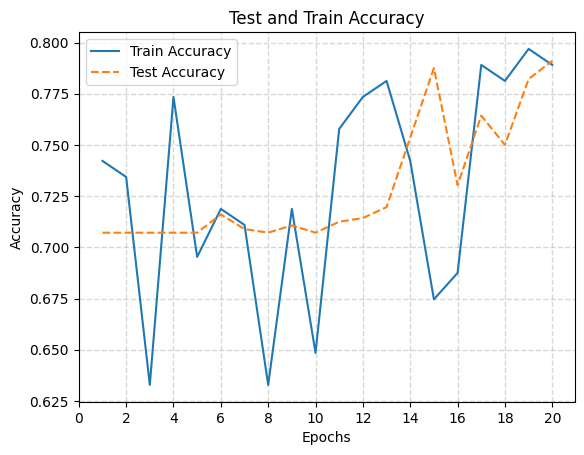

In [18]:
import matplotlib.pyplot as plt

# accuarcy Plot
plt.plot(df1["Epochs"], df1["Train Accuracy"], label='Train Accuracy')
plt.plot(df1["Epochs"], df1["Test Accuracy"], label='Test Accuracy', linestyle='--')

plt.title('Test and Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(linestyle='--', linewidth=1, alpha=0.5)
plt.xticks(range(0, len(df1["Epochs"]) + 1, 2))

plt.show()
